### Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
import seaborn as sns
import warnings
import datetime as dt
from datetime import timedelta
warnings.filterwarnings('ignore')

sns.set()

### Load dataset

In [2]:
# Import the dataset into dataframe 
# This is where I downloaded the dataset: https://data.gov.sg/dataset/resale-flat-prices
# I picked the time frame between Jan-2017 and Aug-2023

data = pd.read_csv('Housing_Resale_Dataset.csv')

In [3]:
data.head()

# From this dataframe, we can see that there are 160795 rows and 11 columns

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [4]:
data.shape

(160795, 11)

# 1. Data Cleaning

## 1.1 Checking Data Types

In [5]:
# Then we would like to check whether each column has the appropriate data type

data.dtypes

# After checking the data type of each column, these are the things we need to do next:
## renaming column 'month' to resale_date to avoid confusion
## changing data type of resale_date from string to datetime
## changing data type of remaining_lease from string to integer
## extracting new columns, i.e year and month, from resale_date

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease         object
resale_price           float64
dtype: object

## 1.2 Renaming Columns and Changing Types

In [6]:
# rename 'month' to 'resale_date'

data = data.rename(columns = {'month':'resale_date', 'lease_commence_date':'lease_commence_year'})

In [7]:
# convert data type from string to datetime type

data['resale_date'] = pd.to_datetime(data['resale_date'])
data.dtypes

resale_date            datetime64[ns]
town                           object
flat_type                      object
block                          object
street_name                    object
storey_range                   object
floor_area_sqm                float64
flat_model                     object
lease_commence_year             int64
remaining_lease                object
resale_price                  float64
dtype: object

In [8]:
# From resale_date, we would like to extract new column, i.e year and month

data['resale_year'] = data['resale_date'].dt.year # corresponds to the calendar years
data['resale_month'] = data['resale_date'].dt.month # corresponds to the calendar months

In [9]:
# Then we change the data type of remaining_lease from string to integer

# for context: In Singapore, HDB owners are entitled to the rights of home ownership for 99 years
# after that, the flats will be returned to the state
# Therefore, the remaining lease will be 99 years - (resale date - lease commence year)

data['remaining_lease'] = 99 - (data['resale_year'] - data['lease_commence_year'])

In [10]:
data

# Here we have a quite neat dataset, although the columns' order is not very good

,resale_date,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_year,remaining_lease,resale_price,resale_year,resale_month
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,232000.0,2017,1
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60,250000.0,2017,1
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,262000.0,2017,1
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62,265000.0,2017,1
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,265000.0,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160790,2023-08-01,YISHUN,EXECUTIVE,387,YISHUN RING RD,10 TO 12,142.0,Apartment,1988,64,822800.0,2023,8
160791,2023-08-01,YISHUN,EXECUTIVE,355A,YISHUN RING RD,01 TO 03,154.0,Maisonette,1988,64,830000.0,2023,8
160792,2023-08-01,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,61,785000.0,2023,8
160793,2023-08-01,YISHUN,EXECUTIVE,611,YISHUN ST 61,07 TO 09,145.0,Apartment,1987,63,780000.0,2023,8


In [11]:
# So here we group the dataset into 4 groups:
# geographic: related to the geographical location of HDB flats
# prop: related to the characteristics of HDB properties/flats
# temporal: related to time series aspect of the flats
# price

geographic = pd.concat([data['town'], data['block'], data['street_name']], axis = 1)
prop = pd.concat([data.iloc[:, 5:8], data['flat_type']], axis = 1)
temporal = pd.concat([data['resale_date'], data['resale_year'], data['resale_month'], data['lease_commence_year'], data['remaining_lease']], axis = 1)
price = data['resale_price']

In [12]:
# Then we rearrange the columns
new_data = pd.concat([temporal, geographic, prop, price], axis = 1)
new_data

,resale_date,resale_year,resale_month,lease_commence_year,remaining_lease,town,block,street_name,storey_range,floor_area_sqm,flat_model,flat_type,resale_price
0,2017-01-01,2017,1,1979,61,ANG MO KIO,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,2 ROOM,232000.0
1,2017-01-01,2017,1,1978,60,ANG MO KIO,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,3 ROOM,250000.0
2,2017-01-01,2017,1,1980,62,ANG MO KIO,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,3 ROOM,262000.0
3,2017-01-01,2017,1,1980,62,ANG MO KIO,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,3 ROOM,265000.0
4,2017-01-01,2017,1,1980,62,ANG MO KIO,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,3 ROOM,265000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160790,2023-08-01,2023,8,1988,64,YISHUN,387,YISHUN RING RD,10 TO 12,142.0,Apartment,EXECUTIVE,822800.0
160791,2023-08-01,2023,8,1988,64,YISHUN,355A,YISHUN RING RD,01 TO 03,154.0,Maisonette,EXECUTIVE,830000.0
160792,2023-08-01,2023,8,1985,61,YISHUN,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,EXECUTIVE,785000.0
160793,2023-08-01,2023,8,1987,63,YISHUN,611,YISHUN ST 61,07 TO 09,145.0,Apartment,EXECUTIVE,780000.0


## 1.3 Fixing Dataset Errors

In [13]:
# Next would like to check any error and fix it by doing these steps:
## checking for empty cells
## checking for unusual values
## checking for duplicates and removing them if there is any

### Empty cells

In [14]:
new_data.isnull().mean()

# There is no empty cell (all zero)
# Usually I create seaborn's heatmap to check the distribution of empty cells
# but since there is no empty cell, there is no need to do it

resale_date            0.0
resale_year            0.0
resale_month           0.0
lease_commence_year    0.0
remaining_lease        0.0
town                   0.0
block                  0.0
street_name            0.0
storey_range           0.0
floor_area_sqm         0.0
flat_model             0.0
flat_type              0.0
resale_price           0.0
dtype: float64

### Duplicate data

In [15]:
# Checking for duplicates

new_data[new_data.duplicated()]

# There are 341 duplicate cells

,resale_date,resale_year,resale_month,lease_commence_year,remaining_lease,town,block,street_name,storey_range,floor_area_sqm,flat_model,flat_type,resale_price
77,2017-01-01,2017,1,1981,63,BEDOK,709,BEDOK RESERVOIR RD,07 TO 09,68.0,New Generation,3 ROOM,310000.0
243,2017-01-01,2017,1,1975,57,BUKIT MERAH,106,HENDERSON CRES,07 TO 09,81.0,Improved,4 ROOM,470000.0
305,2017-01-01,2017,1,1979,61,CENTRAL AREA,271,QUEEN ST,16 TO 18,68.0,Improved,3 ROOM,470000.0
510,2017-01-01,2017,1,1998,80,JURONG EAST,265,TOH GUAN RD,04 TO 06,101.0,Model A,4 ROOM,470000.0
591,2017-01-01,2017,1,2010,92,JURONG WEST,337A,TAH CHING RD,19 TO 21,92.0,Model A,4 ROOM,470000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154162,2023-05-01,2023,5,1976,52,WOODLANDS,7,MARSILING DR,04 TO 06,88.0,Improved,4 ROOM,360000.0
154559,2023-06-01,2023,6,1979,55,BEDOK,92,BEDOK NTH AVE 4,01 TO 03,67.0,New Generation,3 ROOM,350000.0
155709,2023-06-01,2023,6,2018,94,SEMBAWANG,121B,CANBERRA ST,04 TO 06,113.0,Improved,5 ROOM,680000.0
157055,2023-07-01,2023,7,2018,94,HOUGANG,997C,BUANGKOK CRES,04 TO 06,113.0,Improved,5 ROOM,700000.0


In [16]:
# drop all duplicates
new_data = new_data.drop_duplicates()

In [17]:
# check whether there is any inappropriate values and fix them accordingly
# here we separate the dataset into numerical and categorical

num = new_data.select_dtypes(include = 'number') #numerical/quantitative
cat = new_data.select_dtypes(exclude = 'number') #categorical/qualitative

# For checking errors, I usually look for these things:
## same name but different cases (e.g 'Bukit timah' vs 'BUKIT TIMAH')
## same name but with extra spaces (e.g 'Bukit Timah' vs 'Bukit Timah ')
## numerical values in categorical columns or categorical values in numerical columns
## extremely large or extremely small numerical values
## empty spaces (e.g ' ')
## etc

In [18]:
for i,column in enumerate(cat):
    print(f"{i+1}.", column," : ", cat[column].nunique(), 'values')
    print()
    print(np.sort(cat[column].unique()))
    print()
    
# we do not see any unusual value here
# However, columns 'block' and 'street_names' has extremely large number of values (2000++ and 500++, respectively)
# So most likely we will drop them in our analyses later on

1. resale_date  :  80 values

['2017-01-01T00:00:00.000000000' '2017-02-01T00:00:00.000000000'
 '2017-03-01T00:00:00.000000000' '2017-04-01T00:00:00.000000000'
 '2017-05-01T00:00:00.000000000' '2017-06-01T00:00:00.000000000'
 '2017-07-01T00:00:00.000000000' '2017-08-01T00:00:00.000000000'
 '2017-09-01T00:00:00.000000000' '2017-10-01T00:00:00.000000000'
 '2017-11-01T00:00:00.000000000' '2017-12-01T00:00:00.000000000'
 '2018-01-01T00:00:00.000000000' '2018-02-01T00:00:00.000000000'
 '2018-03-01T00:00:00.000000000' '2018-04-01T00:00:00.000000000'
 '2018-05-01T00:00:00.000000000' '2018-06-01T00:00:00.000000000'
 '2018-07-01T00:00:00.000000000' '2018-08-01T00:00:00.000000000'
 '2018-09-01T00:00:00.000000000' '2018-10-01T00:00:00.000000000'
 '2018-11-01T00:00:00.000000000' '2018-12-01T00:00:00.000000000'
 '2019-01-01T00:00:00.000000000' '2019-02-01T00:00:00.000000000'
 '2019-03-01T00:00:00.000000000' '2019-04-01T00:00:00.000000000'
 '2019-05-01T00:00:00.000000000' '2019-06-01T00:00:00.000000

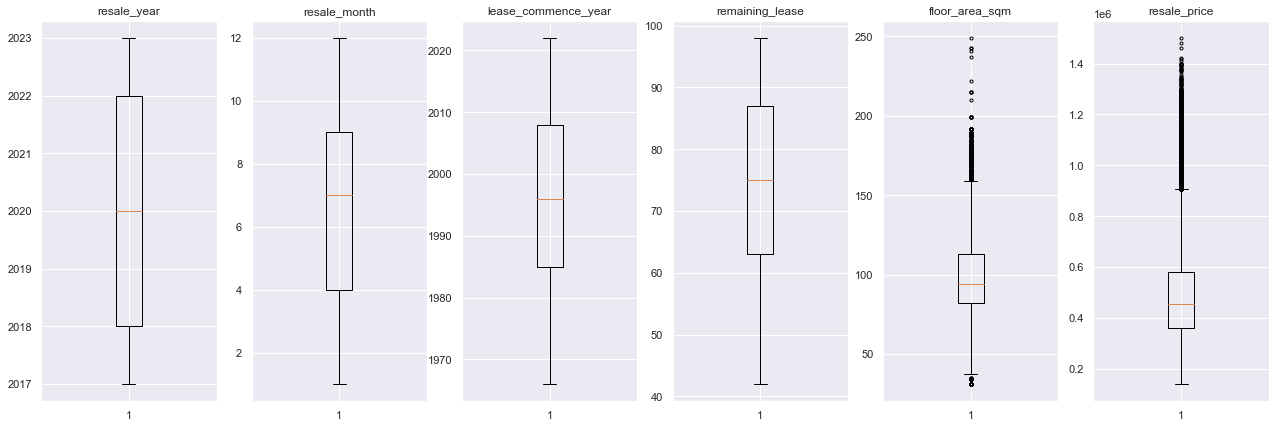

In [19]:
# for the numerical columns, we want to check any anomaly by creating box plots

num.columns.nunique()
ncols = num.columns.nunique()
fig, ax = plt.subplots(ncols = ncols, figsize = [22,7])

for i,col in enumerate(num.columns):
    ax[i].boxplot(data = num, x = col, flierprops = {'marker' : '.'})
    ax[i].set_title(f'{col}')
    
# also, we do not see unusual values

In [20]:
new_data['flat_model'] = new_data['flat_model'].str.upper() # change to uppercase, to make it consistent with the rest

## 1.4 Storing Clean Dataset

In [21]:
cleandata = new_data.copy() # Then we rename our dataset
%store cleandata

Stored 'cleandata' (DataFrame)


In [22]:
cleandata.head()

# Data cleaning phase done!

,resale_date,resale_year,resale_month,lease_commence_year,remaining_lease,town,block,street_name,storey_range,floor_area_sqm,flat_model,flat_type,resale_price
0,2017-01-01,2017,1,1979,61,ANG MO KIO,406,ANG MO KIO AVE 10,10 TO 12,44.0,IMPROVED,2 ROOM,232000.0
1,2017-01-01,2017,1,1978,60,ANG MO KIO,108,ANG MO KIO AVE 4,01 TO 03,67.0,NEW GENERATION,3 ROOM,250000.0
2,2017-01-01,2017,1,1980,62,ANG MO KIO,602,ANG MO KIO AVE 5,01 TO 03,67.0,NEW GENERATION,3 ROOM,262000.0
3,2017-01-01,2017,1,1980,62,ANG MO KIO,465,ANG MO KIO AVE 10,04 TO 06,68.0,NEW GENERATION,3 ROOM,265000.0
4,2017-01-01,2017,1,1980,62,ANG MO KIO,601,ANG MO KIO AVE 5,01 TO 03,67.0,NEW GENERATION,3 ROOM,265000.0


In [24]:
cleandata.shape

(160454, 13)